<a href="https://colab.research.google.com/github/sayansanyal4/VGG19_MODEL/blob/main/VGG19_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES**

In [28]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# **MOUNT DRIVE**

In [33]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DEFINING PATH**

pos


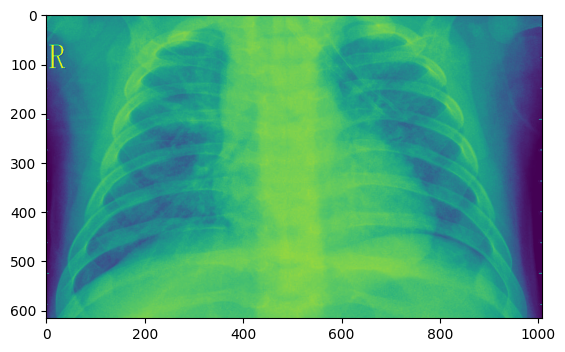

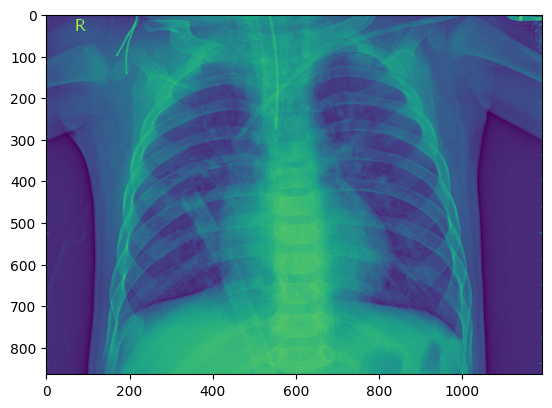

neg


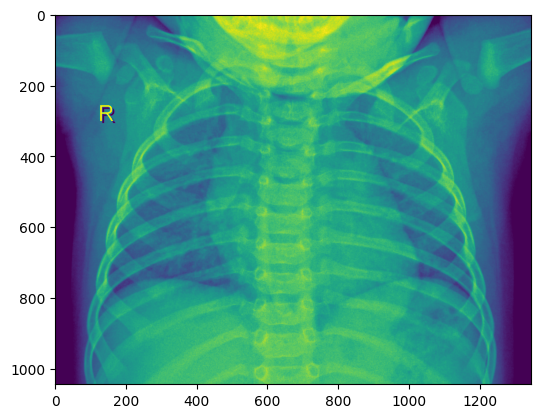

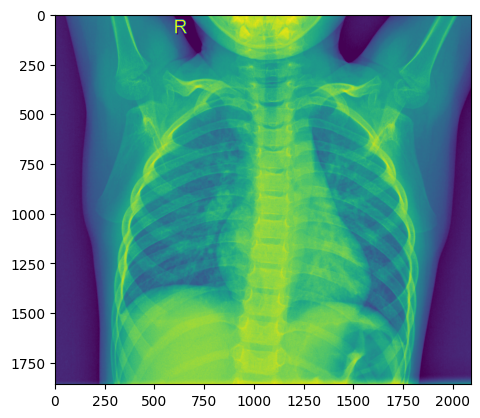

In [3]:
train_path = '/content/drive/My Drive/dataset/lung_canc/training_data'
valid_path = '/content/drive/My Drive/dataset/lung_canc/validation'
test_path = '/content/drive/My Drive/dataset/lung_canc/testing_data'
for folder in os.listdir(train_path):
  sub_path=train_path+"/"+folder
  print(folder)
  for i in range(2):
    temp_path=os.listdir(sub_path)[i]
    temp_path=sub_path+"/"+temp_path
    img=mping.imread(temp_path)
    implot=plt.imshow(img)
    plt.show()

# **CONVERTING IMAGES TO PIXELS**

In [4]:
def imagearray(path, size):
  data=[]
  for folder in os.listdir(path):
    sub_path=path+"/"+folder
    for img in os.listdir(sub_path):
      imagepath=sub_path+"/"+img
      img_arr=cv2.imread(imagepath)
      img_arr=cv2.resize(img_arr,size)
      data.append(img_arr)
  return data

In [5]:
%%time
size2=(450,450)
train=imagearray(train_path,size2)
test=imagearray(test_path,size2)
validate=imagearray(valid_path,size2)

CPU times: user 12.4 s, sys: 889 ms, total: 13.2 s
Wall time: 32.6 s


# **NORMALIZATION**

In [6]:
train

[array([[[127, 127, 127],
         [136, 136, 136],
         [139, 139, 139],
         ...,
         [ 87,  87,  87],
         [ 86,  86,  86],
         [ 80,  80,  80]],
 
        [[128, 128, 128],
         [137, 137, 137],
         [143, 143, 143],
         ...,
         [ 81,  81,  81],
         [ 78,  78,  78],
         [ 77,  77,  77]],
 
        [[129, 129, 129],
         [136, 136, 136],
         [141, 141, 141],
         ...,
         [ 81,  81,  81],
         [ 78,  78,  78],
         [ 78,  78,  78]],
 
        ...,
 
        [[ 30,  30,  30],
         [ 37,  37,  37],
         [ 46,  46,  46],
         ...,
         [ 14,  14,  14],
         [ 14,  14,  14],
         [  9,   9,   9]],
 
        [[ 28,  28,  28],
         [ 37,  37,  37],
         [ 47,  47,  47],
         ...,
         [ 15,  15,  15],
         [ 14,  14,  14],
         [  8,   8,   8]],
 
        [[ 28,  28,  28],
         [ 36,  36,  36],
         [ 45,  45,  45],
         ...,
         [ 17,  17,  17],
  

In [7]:
x_train=np.array(train)
x_test=np.array(test)
x_valid=np.array(validate)
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(200, 450, 450, 3)
(200, 450, 450, 3)
(100, 450, 450, 3)


In [8]:
x_train=x_train/255
x_test=x_test/255
x_valid=x_valid/255

# **DEFINING TARGET VARIABLES**

In [9]:
def data_class(data_path, size, class_mode):
  datagen=ImageDataGenerator(rescale=1./255)
  classes=datagen.flow_from_directory(data_path,
                                      target_size=size,
                                      batch_size=32,
                                      class_mode=class_mode)
  return classes

In [10]:
train_class=data_class(train_path, size2,"sparse")
test_class=data_class(test_path, size2,"sparse")
validate_class=data_class(valid_path, size2,"sparse")
print(train_path)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 1 classes.
/content/drive/My Drive/dataset/lung_canc/training_data


In [11]:
y_train=train_class.classes
y_test=test_class.classes
y_validate=validate_class.classes
print("y_train", y_train,
      "\ny_test", y_test,
      "\ny_validate", y_validate)

y_train [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 
y_test [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 
y_validate [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

In [12]:
train_class.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [13]:
train_class.class_indices

{'neg': 0, 'pos': 1}

In [14]:
print("y_train_shape", y_train.shape,
      "y_test_shape", y_test.shape,
      "y_validate_shape", y_validate.shape)

y_train_shape (200,) y_test_shape (200,) y_validate_shape (100,)


In [15]:
vgg=VGG19(input_shape=(450,450,3), weights="imagenet", include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [16]:
for layer in vgg.layers:
  layer.trainable=False

In [17]:
x=Flatten()(vgg.output)
prediction= Dense(3,activation="softmax")(x)

In [18]:
model=Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450, 450, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 450, 450, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 450, 450, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 225, 225, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 225, 225, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 225, 225, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 112, 112, 128)     0     

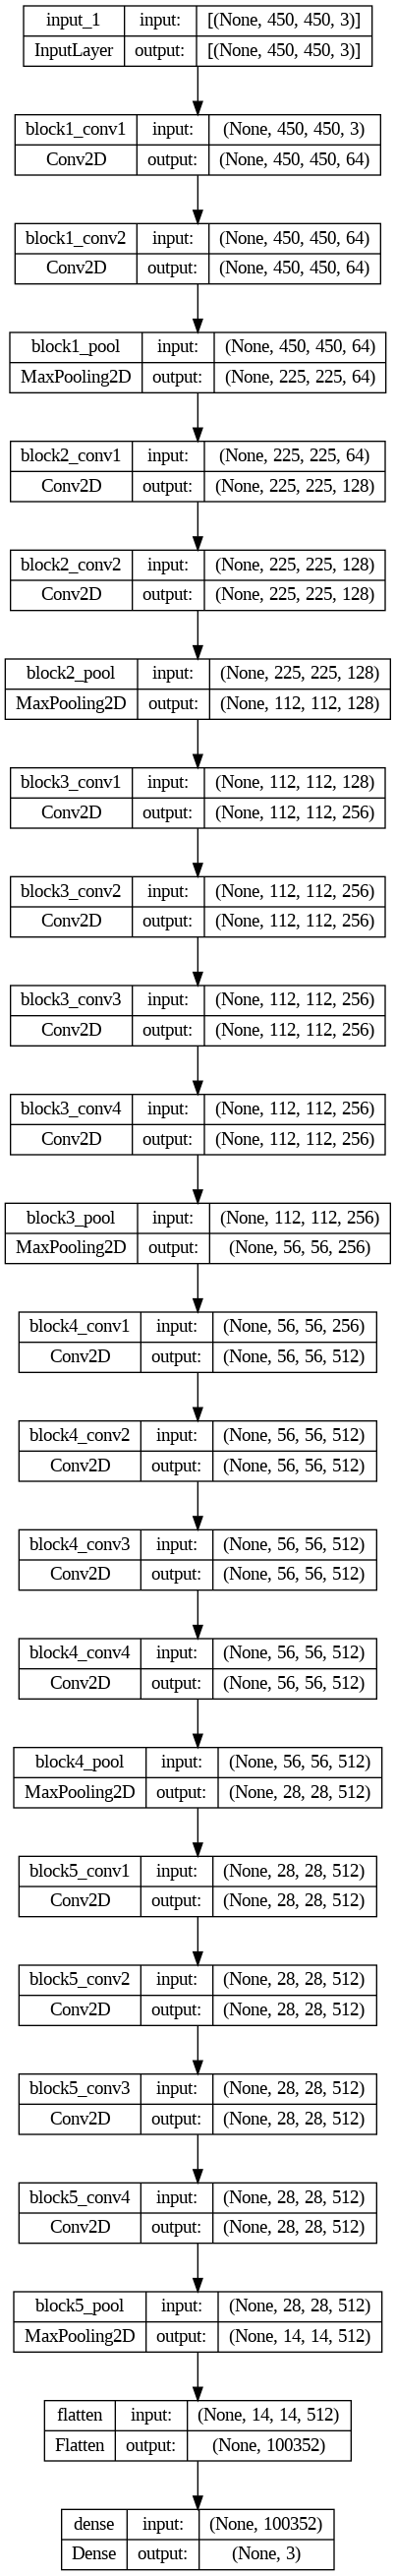

In [19]:
plot_model(model=model,show_shapes=True)

In [20]:
early_stop=EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
history=model.fit(x_train,y_train,
          validation_data=(x_valid,y_validate),
          epochs=3,
          callbacks=[early_stop],
          batch_size=30,
          shuffle=True)

Epoch 1/3
7/7 [==============================] - 870s 131s/step - loss: 1.9578 - accuracy: 0.5450 - val_loss: 0.3356 - val_accuracy: 0.8300
Epoch 2/3
7/7 [==============================] - 806s 121s/step - loss: 0.5582 - accuracy: 0.8400 - val_loss: 1.4037 - val_accuracy: 0.6700
Epoch 3/3
7/7 [==============================] - 860s 130s/step - loss: 0.3486 - accuracy: 0.9150 - val_loss: 10.7197 - val_accuracy: 0.3500


# **VISUALIZATION**

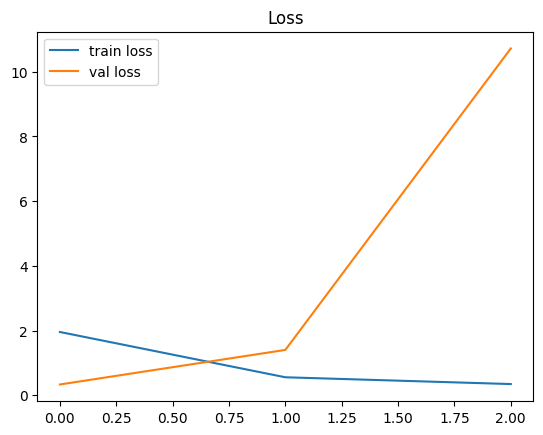

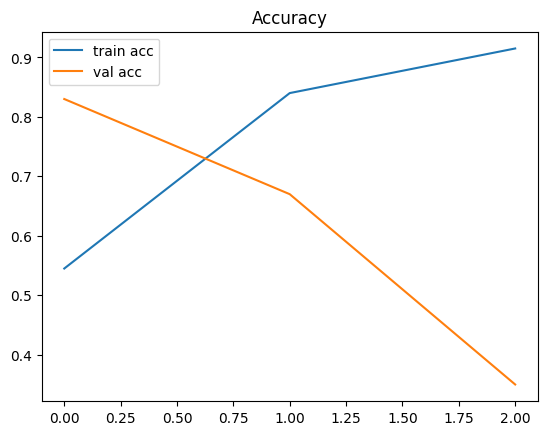

<Figure size 640x480 with 0 Axes>

In [23]:
# loss
# plt.figure(figsize=(10,2))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()
plt.savefig('LossVal_loss')

# accuracies
# plt.figure(figsize=(10,2))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

# **MODEL EVALUATION**

In [24]:
model.evaluate(x_test,y_test,batch_size=32)

7/7 [==============================] - 541s 76s/step - loss: 0.5990 - accuracy: 0.8750


[0.5989878177642822, 0.875]

In [25]:
y_pred = model.predict(x_test)

7/7 [==============================] - 543s 75s/step


In [26]:
y_pred = np.argmax(y_pred,axis=1)

In [27]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        75
           1       1.00      0.80      0.89       125

    accuracy                           0.88       200
   macro avg       0.88      0.90      0.87       200
weighted avg       0.91      0.88      0.88       200



# **CONFUSION MATRIX**

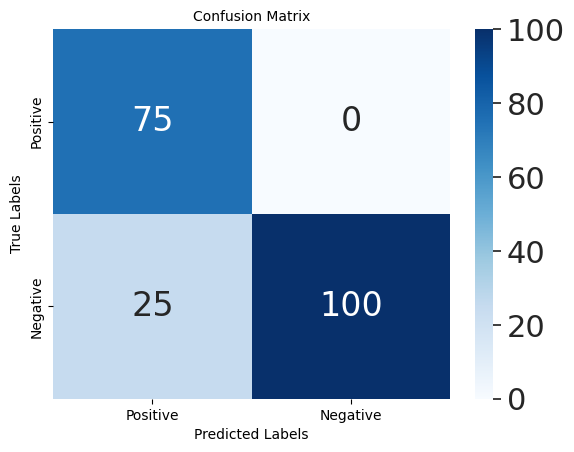

In [29]:
cm = confusion_matrix(y_pred, y_test)

plt.figure()
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm, annot = True, fmt='g',cmap="Blues", ax = ax)
# Labels, title and Ticks
ax.set_xlabel('Predicted Labels', fontsize = 10);ax.set_ylabel('True Labels', fontsize = 10);
ax.set_title('Confusion Matrix', fontsize = 10);
ax.xaxis.set_ticklabels(['Positive','Negative'], fontsize = 10);ax.yaxis.set_ticklabels(['Positive','Negative'], fontsize = 10);


In [30]:
f1_score(y_test,y_pred, average = 'micro')

0.875

In [31]:
recall_score(y_test,y_pred, average = 'weighted')

0.875

In [32]:
precision_score(y_test,y_pred, average = 'micro')

0.875

# **SAVING MODEL**

In [34]:
model.save('/content/drive/My Drive/ML_MODELS/VGG19_Classification_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
